In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


fetching out basic info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling missing values

In [15]:
df_copy=df #creating a copy of the dataset

In [17]:
df.fillna(df.mean(numeric_only=True),inplace=True)   ##replaced the null values of numeric data with the mean

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#handing categorical data
#can replace with the mode



In [37]:
mode_cabin=df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_cabin,inplace=True)
mode_embarked=df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked,inplace=True)

In [38]:
df.isnull().sum()  #cleared all the missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Categorical data into numerical using encoding

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
print(df[['Sex', 'Embarked', 'Cabin']].head())

      Sex Embarked    Cabin
0    male        S  B96 B98
1  female        C      C85
2  female        S       G6
3  female        S     C123
4    male        S  B96 B98


In [42]:
#dropping irrelevant columns like name and cabin
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [69]:
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,Q
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,Q


In [71]:
df_embarked = pd.get_dummies(df, columns=['Embarked'])
df_embarked.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,False,True
1,2,1,1,female,38.0,1,0,71.2833,True,False
2,3,1,3,female,26.0,0,0,7.9250,False,True
3,4,1,1,female,35.0,1,0,53.1000,False,True
4,5,0,3,male,35.0,0,0,8.0500,False,True


In [73]:
df_sex=pd.get_dummies(df, columns=['Sex'])
df_sex.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,False,True
1,2,1,1,38.0,1,0,71.2833,Q,True,False
2,3,1,3,26.0,0,0,7.9250,S,True,False
3,4,1,1,35.0,1,0,53.1000,S,True,False
4,5,0,3,35.0,0,0,8.0500,S,False,True


In [139]:
#instead of doing differently we can do it usinsg column tranformation
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('OHE', OneHotEncoder(sparse_output=False,drop='first'), ['Embarked','Sex'])
], remainder='passthrough')

df_transformed=ct.fit_transform(df)

In [140]:
ct.get_feature_names_out()

array(['OHE__Embarked_S', 'OHE__Sex_male', 'remainder__PassengerId',
       'remainder__Survived', 'remainder__Pclass', 'remainder__Age',
       'remainder__SibSp', 'remainder__Parch', 'remainder__Fare'],
      dtype=object)

In [141]:
df_transformed=pd.DataFrame(df_transformed,columns=ct.get_feature_names_out())
df_transformed.head()

,OHE__Embarked_S,OHE__Sex_male,remainder__PassengerId,remainder__Survived,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,1.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,1.0,1.0,5.0,0.0,3.0,35.0,0.0,0.0,8.0500


In [142]:
df_transformed.shape

(891, 9)

Normalize/Standardize Numerical Features

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df_transformed.select_dtypes(include=['int64', 'float64']).columns
df_transformed[numeric_cols] = scaler.fit_transform(df_transformed[numeric_cols])

In [144]:
df_transformed.head()

,OHE__Embarked_S,OHE__Sex_male,remainder__PassengerId,remainder__Survived,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,0.615838,0.737695,-1.730108,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.623803,-1.355574,-1.726220,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.615838,-1.355574,-1.722332,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,0.615838,-1.355574,-1.718444,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.615838,0.737695,-1.714556,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337


Visulaize the box plot and the outliers

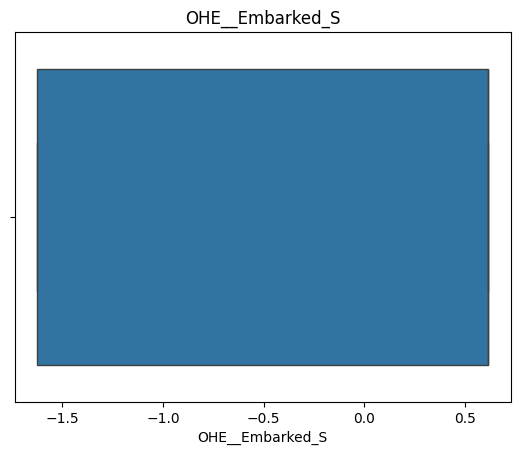

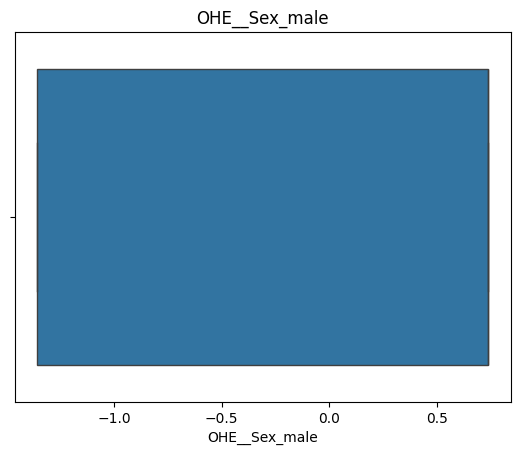

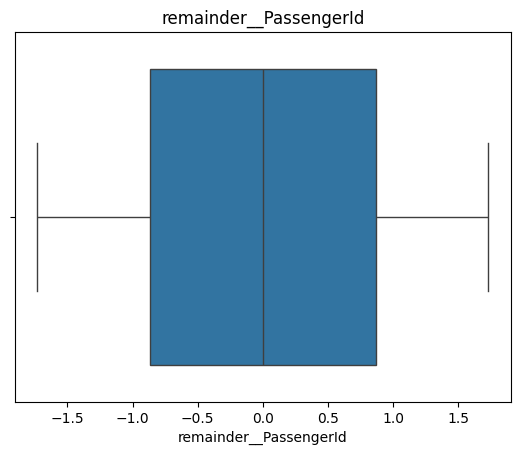

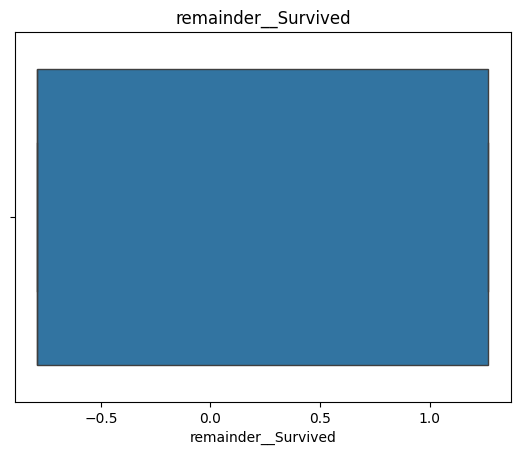

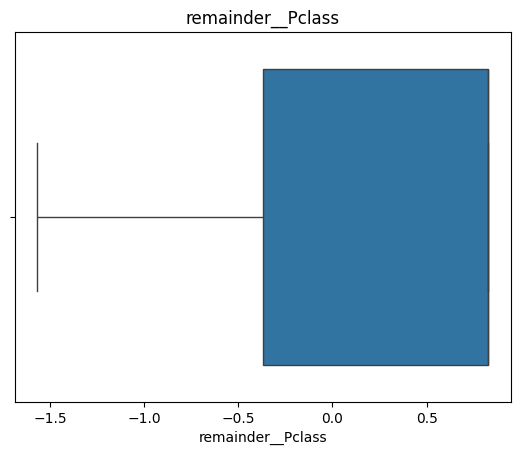

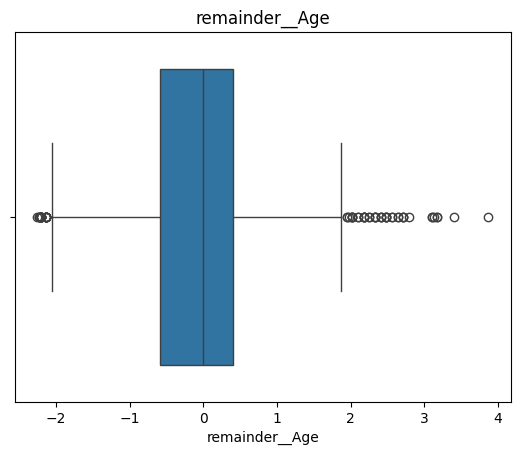

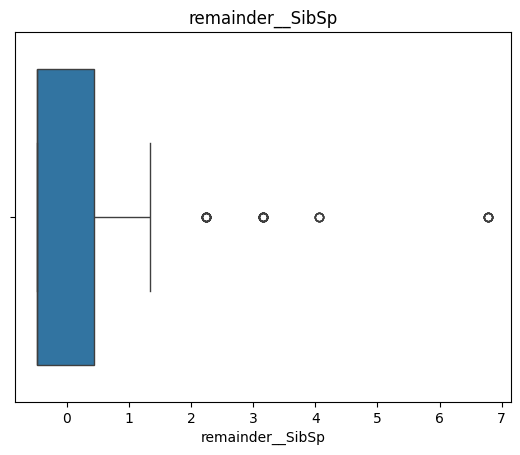

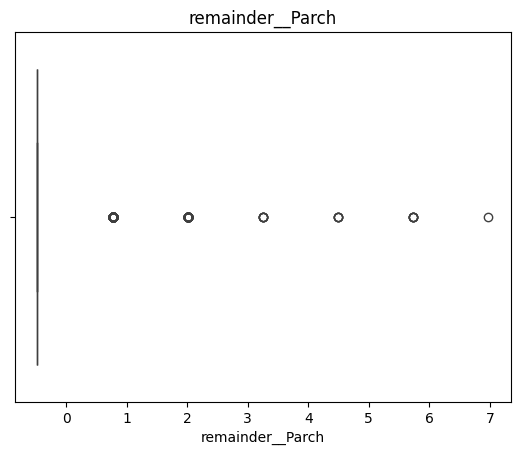

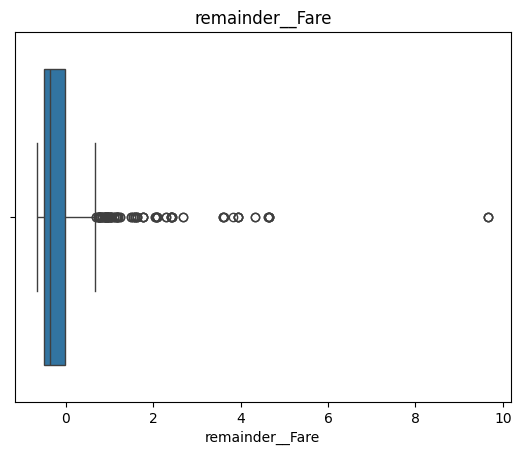

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.boxplot(x=df_transformed[col])
    plt.title(col)
    plt.show()


Removing Outliers


In [156]:
Q1 = df_transformed[numeric_cols].quantile(0.25)
Q3=df_transformed[numeric_cols].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
df_final = df_transformed[~((df_transformed[numeric_cols] < lower_bound) | (df_transformed[numeric_cols] > upper_bound)).any(axis=1)]

In [157]:
df_final=pd.DataFrame(df_final)
df_final.shape

(577, 9)

we can see that there were many outliers in each coulumn, hence on removing them the number of rows bacame 577 from 891.
hence data has been lost



In [153]:
df_transformed.shape

(891, 9)